In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\Users\suchi\AppData\Local\Temp\ipykernel_15772\660668080.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
## Data Ingestions step
data=pd.read_csv("data\Credit_Card.csv")

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Dropping the 'id' Column

In [6]:

data=data.drop('ID',axis=1)

### Rename the 'default.payment.next.month' and ' PAY_0' Columns

In [7]:
data.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [8]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Dividing into Dependent and Independent Varaibles

In [9]:

X=data.drop('def_pay',axis=1)
y=data[['def_pay']]

In [10]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [12]:
y

,def_pay
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


#### From the EDA its clear that there are outliers in LIMIT_BAL,'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

In [13]:
X_outliers=X[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

### Handling outliers

In [14]:
import numpy as np

upper_limit=[]
lower_limit=[]
for i in X_outliers.columns:
    Q1=np.percentile(X_outliers[i],25)
    Q2=np.percentile(X_outliers[i],50)
    Q3=np.percentile(X_outliers[i],75)
    IQR=Q3-Q1
    UL=Q3+IQR*1.5
    LL=Q1-IQR*1.5
    upper_limit.append(UL)
    lower_limit.append(LL)         
    print(f'Upper limit of {i} is {UL}')
    print(f'Lower limit of {i} is {LL}')

Upper limit of LIMIT_BAL is 525000.0
Lower limit of LIMIT_BAL is -235000.0
Upper limit of BILL_AMT1 is 162389.375
Lower limit of BILL_AMT1 is -91739.625
Upper limit of BILL_AMT2 is 155538.5
Lower limit of BILL_AMT2 is -88547.5
Upper limit of BILL_AMT3 is 146412.5
Lower limit of BILL_AMT3 is -83581.5
Upper limit of BILL_AMT4 is 132774.875
Lower limit of BILL_AMT4 is -75942.125
Upper limit of BILL_AMT5 is 122831.75
Lower limit of BILL_AMT5 is -70878.25
Upper limit of BILL_AMT6 is 121111.625
Lower limit of BILL_AMT6 is -70657.375
Upper limit of PAY_AMT1 is 11015.0
Lower limit of PAY_AMT1 is -5009.0
Upper limit of PAY_AMT2 is 11250.5
Lower limit of PAY_AMT2 is -5417.5
Upper limit of PAY_AMT3 is 10677.5
Lower limit of PAY_AMT3 is -5782.5
Upper limit of PAY_AMT4 is 9589.125
Lower limit of PAY_AMT4 is -5279.875
Upper limit of PAY_AMT5 is 9700.0
Lower limit of PAY_AMT5 is -5416.0
Upper limit of PAY_AMT6 is 9823.375
Lower limit of PAY_AMT6 is -5705.625


In [15]:
j=0
for i in X_outliers.columns:
    X_outliers[i]=np.where(X_outliers[i]>upper_limit[j],upper_limit[j],np.where(X_outliers[i]<lower_limit[j],lower_limit[j],X_outliers[i]))
    j=j+1

In [16]:
X[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=X_outliers[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

<Axes: >

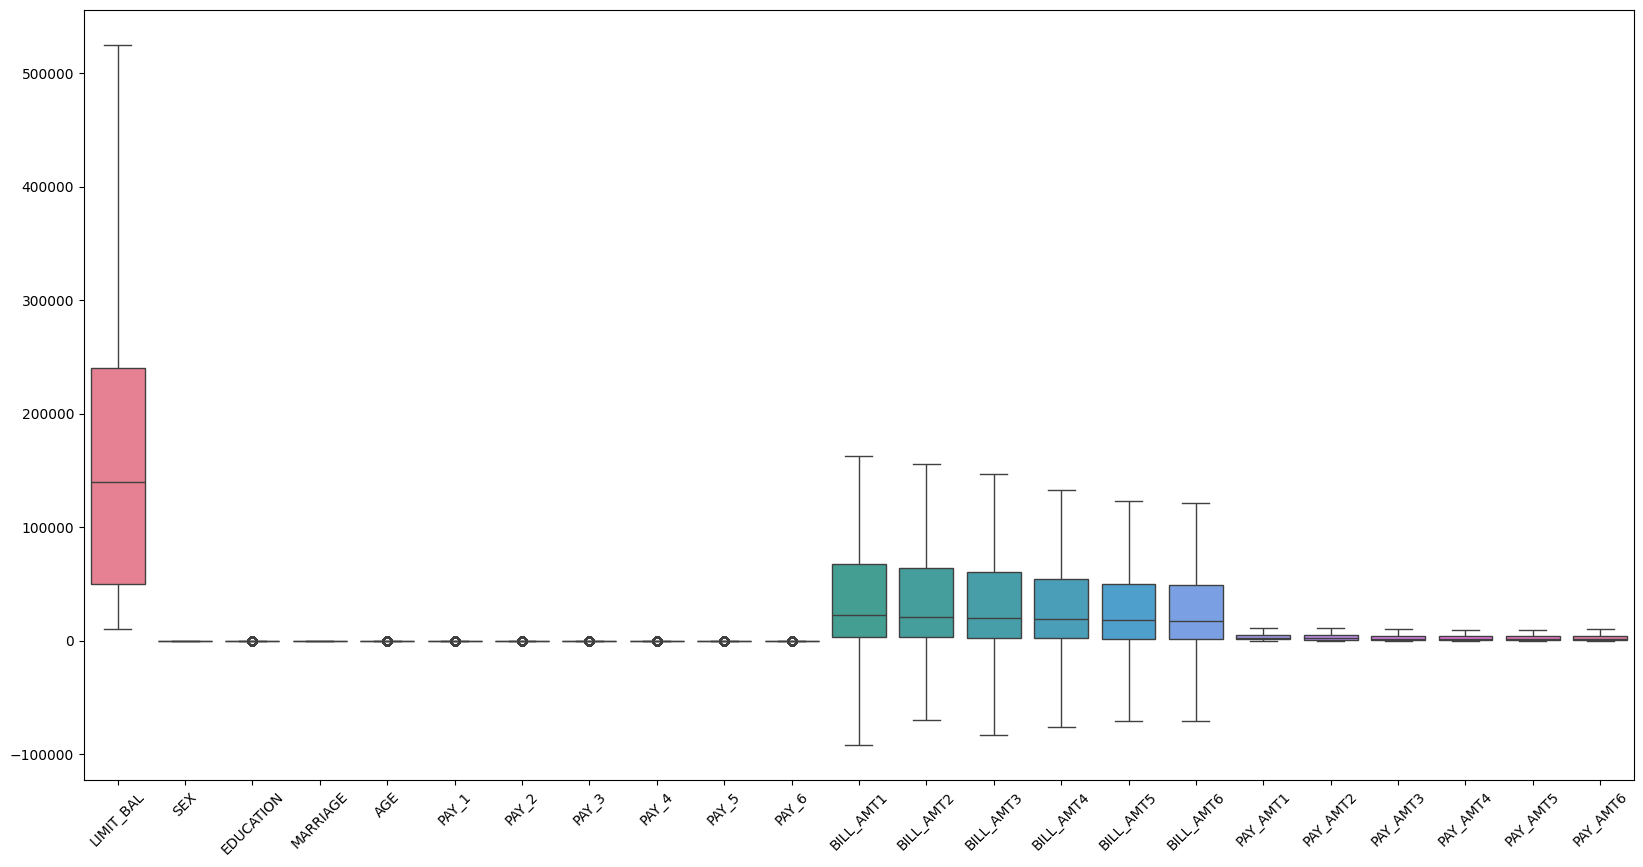

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#replotting the box plot to check for outliers
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=X)

### All the outliers are handled .

In [18]:
X.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [19]:
#segregating the numerical and categorical columns
X.AGE=X.AGE.astype('float64')#to get Age as numerical column
categorical_col=X.select_dtypes(include=['int64']).columns

In [20]:
categorical_col

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')

In [21]:
numerical_col=X.select_dtypes(include=['float64']).columns

In [22]:
numerical_col

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [23]:
#creating automated pipelines for feature engineering  and importing necessary libraries
from sklearn.impute import SimpleImputer         #handling missing values
#from sklearn.preprocessing import OrdinalEncoder #handling ordinal encoding
from sklearn.preprocessing import StandardScaler #scaling
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
#creating the numerical pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [25]:
#creating the categorical pipeline
categ_pipeline=Pipeline(
    steps=
    [
       ('imputer',SimpleImputer(strategy='most_frequent')),
       ('scaler',StandardScaler())
    ]
)

In [26]:
#column tranformer for concatenating the columns
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_col),
('categ_pipeline',categ_pipeline,categorical_col)
])

In [27]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')),
                                ('categ_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object'))])

In [28]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [29]:
X_train.shape

(21000, 23)

In [30]:
X_test.shape

(9000, 23)

In [31]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [32]:
X_train.head()

,num_pipeline__LIMIT_BAL,num_pipeline__AGE,num_pipeline__BILL_AMT1,num_pipeline__BILL_AMT2,num_pipeline__BILL_AMT3,num_pipeline__BILL_AMT4,num_pipeline__BILL_AMT5,num_pipeline__BILL_AMT6,num_pipeline__PAY_AMT1,num_pipeline__PAY_AMT2,...,num_pipeline__PAY_AMT6,categ_pipeline__SEX,categ_pipeline__EDUCATION,categ_pipeline__MARRIAGE,categ_pipeline__PAY_1,categ_pipeline__PAY_2,categ_pipeline__PAY_3,categ_pipeline__PAY_4,categ_pipeline__PAY_5,categ_pipeline__PAY_6
0,-1.149540,-1.031921,-0.832955,-0.835012,-0.849797,-0.873393,-0.857092,-0.794845,-0.641245,-0.843502,...,-0.866334,-1.231086,0.189892,0.855242,-0.872883,-0.720412,-0.694606,-0.665419,-1.532938,-0.618300
1,-0.136493,0.599775,-0.864822,-0.864654,-0.825188,-0.727201,-0.846541,-0.828477,-1.002581,-0.461811,...,-0.866334,-1.231086,-1.076056,-1.060909,0.901613,-1.558100,-0.694606,-0.665419,-0.647261,-1.488736
2,0.642774,-0.705581,1.566597,1.719503,1.833266,2.008259,2.239211,2.257249,0.688046,0.302138,...,0.678137,0.812291,-1.076056,0.855242,1.788862,1.792653,1.821359,1.910872,2.009769,1.993008
3,1.499967,0.382216,-0.860931,-0.860596,-0.859457,-0.854419,-0.829182,-0.649619,-1.002581,-0.971110,...,-0.866334,-1.231086,-1.076056,-1.060909,0.901613,-1.558100,-1.533261,-1.524183,-0.647261,-0.618300
4,0.876554,0.926114,2.251142,2.295109,1.766655,1.933629,2.011161,2.102274,1.238790,0.310343,...,0.414751,-1.231086,0.189892,-1.060909,0.014365,0.117276,0.144049,0.193345,0.238416,0.252136


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report


In [34]:
def evaluate_model(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [35]:
models = {
                LogisticRegression(): 'Logistic Regression',
                SVC(kernel='rbf', C=10, degree=5, gamma='auto'): "Support vector",
                KNeighborsClassifier(n_neighbors=20): 'Knn classifier',
                DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=2, max_features='sqrt', max_depth=8,
                                       criterion='entropy'): 'Decision Tree',
                RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=4, min_samples_leaf=5,
                                       max_features='sqrt'): 'Random Forest',
                GaussianNB(): 'Naiye Bayes'
            }

In [36]:
results = {}

for model in models.keys():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = evaluate_model(y_test, y_pred)

    results[scores] = model

best_model_score = max(results.keys())
best_model = results[best_model_score]
best_model_name = models[results[best_model_score]]
print("\n==========================================\n")
print(f"Best model is {best_model_name} with accuracy of {best_model_score * 100}")    



Best model is Random Forest with accuracy of 82.11111111111111


In [38]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [39]:
performance_metrices(y_test,y_pred)

CONFUSION_METRIX: [[6069  995]
 [ 973  963]]
PRECISION_SCORE: 0.49182839632277836
RECALL_SCORE: 0.49741735537190085
F1_SCORE: 0.4946070878274268
ACCURACY_SCORE: 0.7813333333333333


(None, None, None, None, None)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7064
           1       0.49      0.50      0.49      1936

    accuracy                           0.78      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.78      0.78      0.78      9000



## Hyperparameter tuning.

In [41]:
from sklearn.model_selection import GridSearchCV

In [49]:
## RandomForest with Hyperparameter Tuening
forest = RandomForestClassifier()
params = {
    "class_weight":["balanced"],
    "n_estimators":[150,200],
    'max_depth': [10, 8, 5,20],
    'min_samples_split': [2, 5, 10],
}

In [50]:
grid = GridSearchCV(estimator=forest,param_grid=params,cv=3)

In [51]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 8, 5, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200]})

In [52]:
grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 200}

In [53]:
grid.score(X_train,y_train)

0.9677142857142857

In [54]:
y_predict = grid.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_predict))

0.8097777777777778


In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7064
           1       0.58      0.44      0.50      1936

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.69      9000
weighted avg       0.80      0.81      0.80      9000



In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


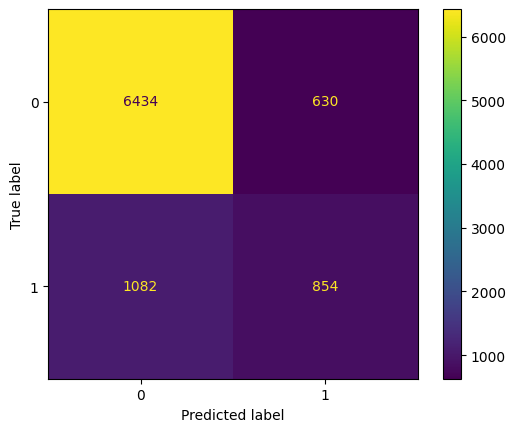

In [58]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [61]:
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [60]:
data.to_csv("data/Cleaned_Credit_Card.csv",index=False)